In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [13]:
X, y = make_classification(n_classes=2, n_samples=50, n_features = 2
                           ,n_informative=2,n_redundant = 0, 
                           n_clusters_per_class= 1)

y[y==0]=-1

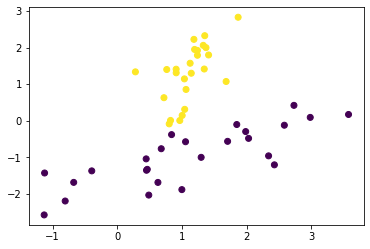

In [14]:
plt.scatter(X[:,0],X[:,1],c=y)


In [15]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solver
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

     pcost       dcost       gap    pres   dres
 0: -1.0897e+01 -2.3414e+01  2e+02  1e+01  2e+00
 1: -3.3017e+01 -2.7664e+01  5e+01  4e+00  7e-01
 2: -7.2280e+01 -5.6742e+01  5e+01  4e+00  7e-01
 3: -6.7055e+01 -5.0616e+01  6e+01  3e+00  6e-01
 4: -5.7967e+01 -4.2224e+01  6e+01  2e+00  4e-01
 5: -3.6260e+01 -2.9881e+01  3e+01  9e-01  2e-01
 6: -1.5772e+01 -2.6627e+01  1e+01  1e-14  8e-15
 7: -2.3447e+01 -2.5105e+01  2e+00  1e-15  6e-15
 8: -2.4666e+01 -2.4686e+01  2e-02  6e-15  7e-15
 9: -2.4681e+01 -2.4681e+01  2e-04  1e-14  7e-15
10: -2.4681e+01 -2.4681e+01  2e-06  2e-14  7e-15
Optimal solution found.


In [17]:
print('w = ', w.flatten())
print('b = ', b[0])

w =  [-2.73462454  6.47172256]
b =  [3.72468401]


[-2.73462454]
[6.47172256]
(10,)
(10,)


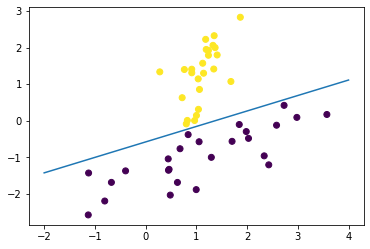

In [19]:
plt.scatter(X[:,0],X[:,1],c = y)
w1 = w[0]
w2 = w[1]
print(w1)
print(w2)
x1 = np.linspace(-2,4,10)
x2= -(w1*x1+b[0])/w2

print(x1.shape)
print(x2.shape)
plt.plot(x1,x2)